In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('/content/train.csv')
titanic
# PassengerId	 = 승객 아이디
# Survived = 생존 여부
# Pclass = 객실 등급, 1st = Upper, 2nd = Middle, 3rd = Lower
# SibSp = 타이타닉 호에 동승한 자매 / 배우자의 수
# Parch = 타이타닉 호에 동승한 부모 / 자식의 수
# Fare = 승객 요금
# Cabin = 방 호수
# Embarked = 탑승지, C = 셰르부르(프랑스), Q = 퀸즈타운(아일랜드), S = 사우샘프턴(영국)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 데이터 전처리 #1

In [3]:
# 성별과 나이, 객실 등급, 일행 여부, 탑승지에 따른 생존 여부 확인
# 티켓 요금은 500불 이상 내신분들이 계셔서 포기

# 우선 데이터 전처리를 위해 데이터 프레임의 정보 출력
titanic.info()

# 나이 컬럼과 탑승지 컬럼에 조금의 null값이 확인
# 방 호수에 많은 null값이 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Cabin 컬럼을 삭제
titanic = titanic.drop(columns = 'Cabin', axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
# EMbarked 컬럼의 null값을 가장 빈번히 나오는 값들로 대체
most_freq = titanic['Embarked'].value_counts(dropna = True).idxmax()
titanic_temp = titanic.copy()
titanic_temp['Embarked'].fillna(most_freq, inplace = True)
titanic_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
# 동승자의 여부가 생존 확률에 영향을 끼치는지 알고싶기 때문에
# SibSp컬럼과 Parch컬럼에 값이 0이 아니면 동승자가 있다고 판단

titanic_temp.loc[(titanic_temp['SibSp']!=0) & (titanic_temp['Parch']!=0), 'IsAlone'] = 0
titanic_temp.loc[(titanic_temp['SibSp']!=0) & (titanic_temp['Parch']==0), 'IsAlone'] = 0
titanic_temp.loc[(titanic_temp['SibSp']==0) & (titanic_temp['Parch']!=0), 'IsAlone'] = 0
titanic_temp.loc[(titanic_temp['SibSp']==0) & (titanic_temp['Parch']==0), 'IsAlone'] = 1
titanic_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  IsAlone      891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [7]:
# Age 컬럼의 null값을 이전값으로 대체
titanic_train = titanic_temp.copy()
titanic_train['Age'].fillna(method='ffill', inplace = True)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  IsAlone      891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


# 특성 분석

In [8]:
survived_male = len(titanic_train[(titanic_train['Survived'] == 1)& (titanic_train['Sex'] == 'male')])
male_total = len(titanic[titanic_train['Sex'] == 'male'])
survived_female = len(titanic_train[(titanic_train['Survived'] == 1)& (titanic_train['Sex'] == 'female')])
female_total = len(titanic[titanic_train['Sex'] == 'female'])
survived_total = len(titanic[titanic_train['Survived'] == 1])

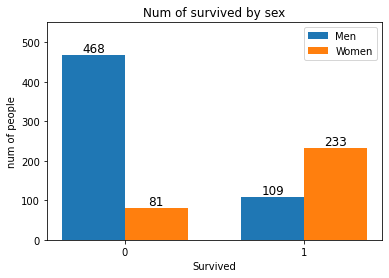

In [9]:
# 성별에 따른 생존자수를 그래프로 출력
labels = [0, 1]
male_cnt = [male_total - survived_male, survived_male]
female_cnt = [female_total - survived_female, survived_female]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_cnt, width, label='Men')
rects2 = ax.bar(x + width/2, female_cnt, width, label='Women')

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

ax.set_xlabel('Survived')
ax.set_ylabel('num of people')
ax.set_title('Num of survived by sex')
ax.set_xticks([0, 1])
ax.legend()
ax.set_ylim([0, 550])

plt.show()

# 사망자의 수는 남성이 훨씬 많음

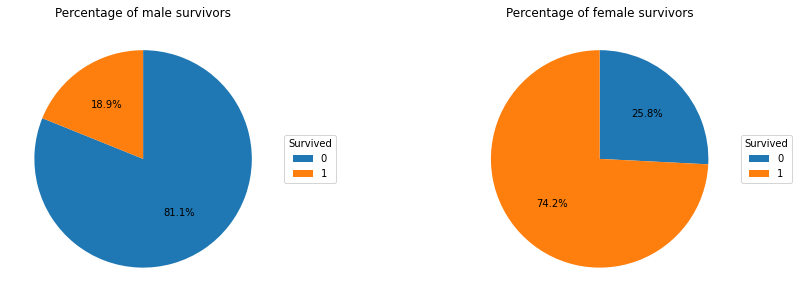

In [10]:
# 남자와 여자의 생존자 비율
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ratio_male = [100 -(100*(survived_male/male_total)), 100*(survived_male/male_total)]
ax1.pie(ratio_male, autopct='%.1f%%', counterclock=False, startangle=90)
ax1.set_title("Percentage of male survivors")
ax1.legend(titanic_train['Survived'],
           title="Survived",
           loc="center left", 
           bbox_to_anchor=(1, 0, 0.5, 1))

ratio_female = [100 -(100*(survived_female/female_total)), 100*(survived_female/female_total)]
ax2.pie(ratio_female, autopct='%.1f%%', counterclock=False, startangle=90)
ax2.set_title("Percentage of female survivors")
ax2.legend(titanic_train['Survived'],
           title="Survived",
           loc="center left", 
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# 사망자의 수는 남성의 비율이 훨씬 큼

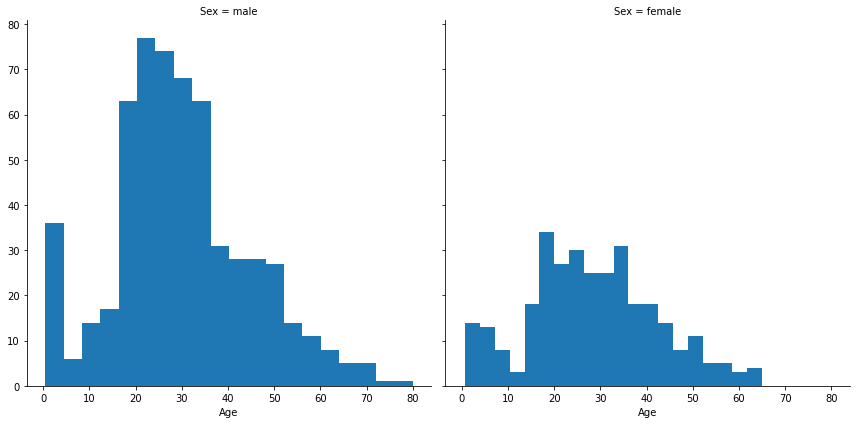

In [11]:
# 성별에 따른 나이 분포
g = sns.FacetGrid(titanic_train, col='Sex', height=6)
g.map(plt.hist, 'Age', bins=20)
plt.show()

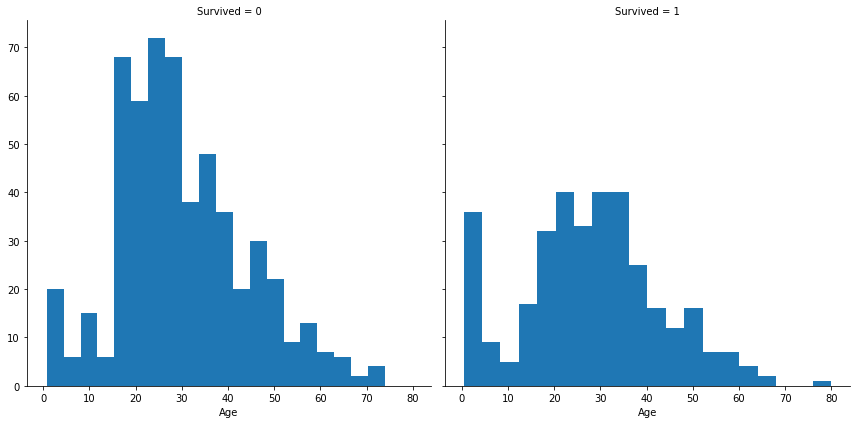

In [12]:
# 나이별 생존자
g = sns.FacetGrid(titanic_train, col='Survived', height=6)
g.map(plt.hist, 'Age', bins=20)
plt.show()

# 사망자는 주로 20~40세로 이루어짐

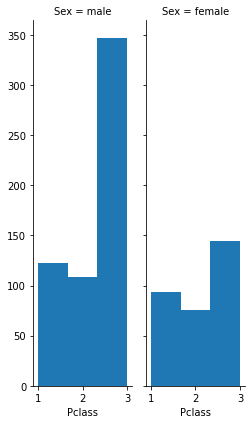

In [13]:
# 객실 등급에 따른 남녀별 인원수
g = sns.FacetGrid(titanic_train, col='Sex', height=6, aspect=0.3)
g.map(plt.hist, 'Pclass', bins=3)
g.set(xticks=[1, 2, 3])
plt.show()
# 3클래스 객실에 남성의 인원수가 제일 많음

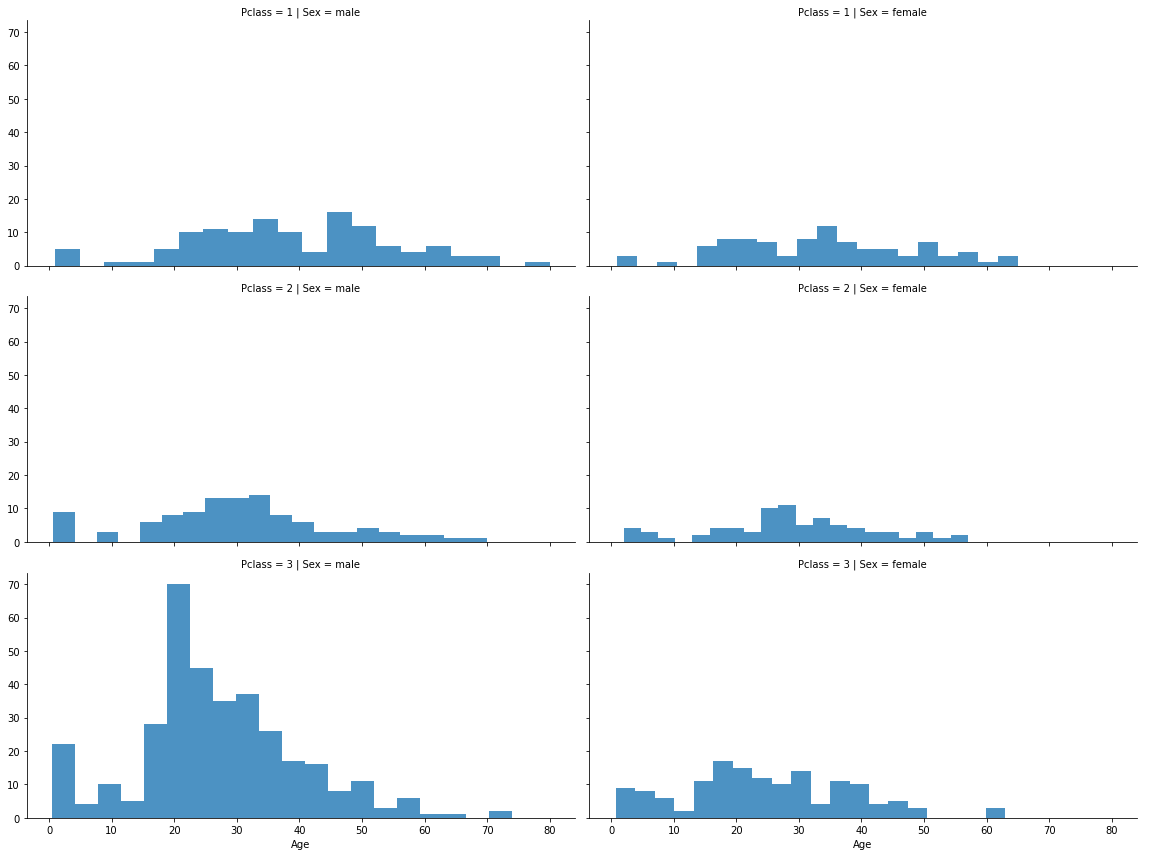

In [14]:
# 객실에 따른 남녀의 나이 분포
grid = sns.FacetGrid(titanic_train, row='Pclass', col='Sex', height=4, aspect=2)
grid.map(plt.hist, 'Age', alpha=0.8, bins=20)
grid.add_legend()
plt.show()

# 3클래스 객실에 20~30세 남자의 인원수가 가장 많음

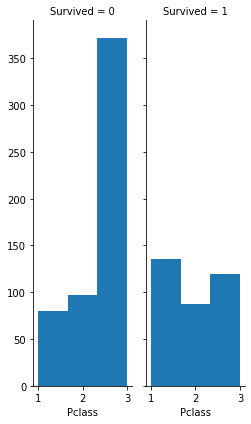

In [15]:
# 객실 등급에 따른 생존자
g = sns.FacetGrid(titanic_train, col='Survived', height=6, aspect=0.3)
g.map(plt.hist, 'Pclass', bins=3)
g.set(xticks=[1, 2, 3])
plt.show()

# 3등급 객실의 인원수가 가장 많음에도 생존자수는 1등급 객실의 인원이 가장 많음
# 3등급 객실의 사망자 수가 가장 많음

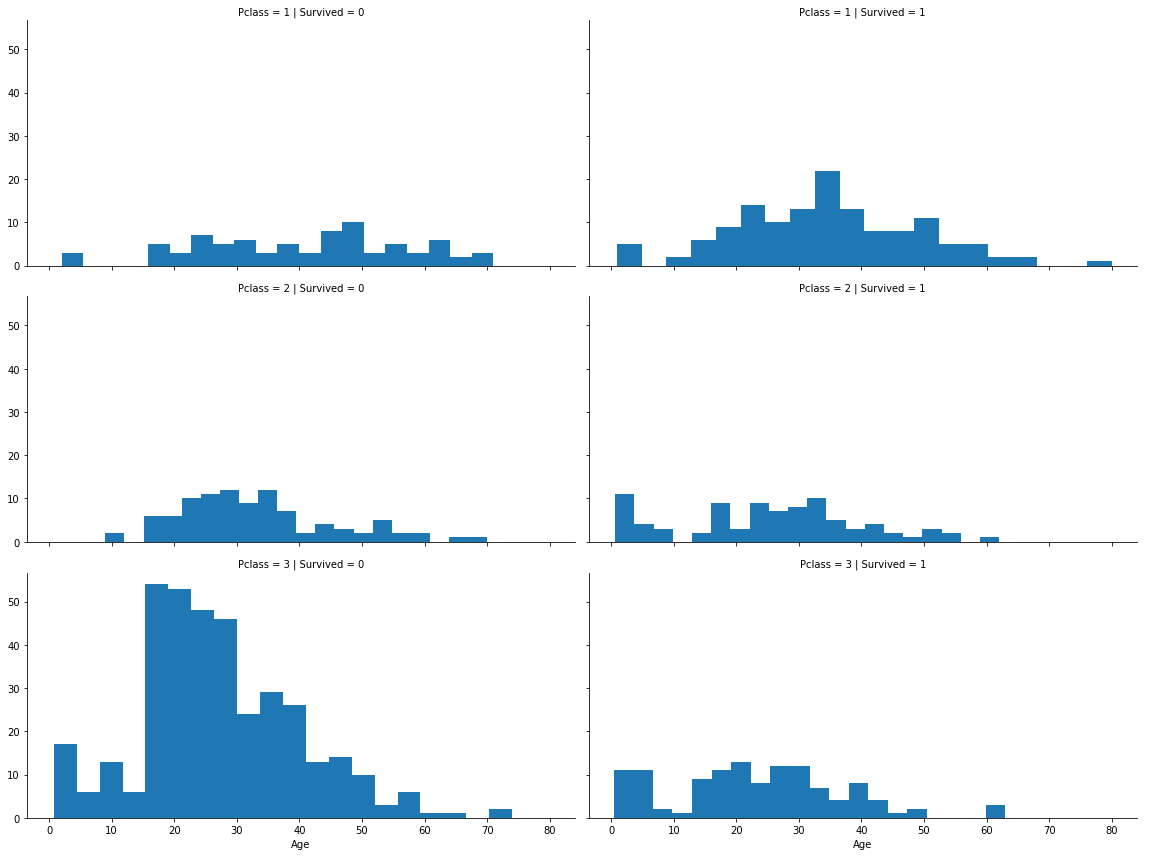

In [16]:
# 객실별 각 연령대의 생존자
grid = sns.FacetGrid(titanic_train, col='Survived', row = 'Pclass', height=4, aspect=2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()
plt.show()
# 20~30세 남자 인원이 가장 많은 3등급 객실에서 사망확률이 매우 높음

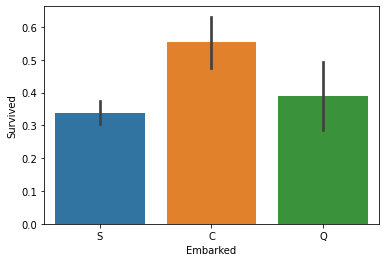

In [17]:
# 탑승지에 따른 생존자 비율
sns.barplot(x = 'Embarked', y = 'Survived',data=titanic_train)
plt.show()

# C에서 승선한 사람이 생존률이 더 높음

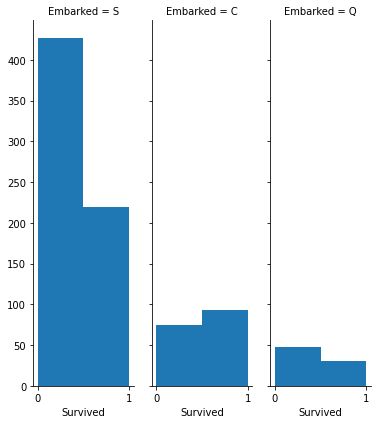

In [18]:
# 탑승지에 따른 생존자
g = sns.FacetGrid(titanic_train, col='Embarked', height=6, aspect=0.3)
g.map(plt.hist, 'Survived', bins=2)
g.set(xticks=[0, 1])
plt.show()

# S 나 Q에서 승선한 승객은 모두 사망자 수보다 생존자들의 수가 더 적은데 비해
# C에서 승선한 승객은 사망자 수보다 생존자가 더 많다

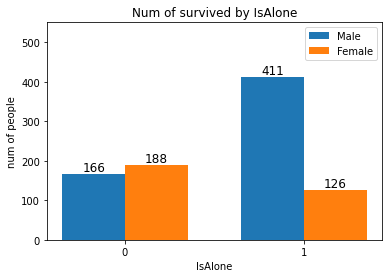

In [19]:
# 성별에 따른 일행 여부를 확인

labels = [0, 1]

male_alone = len(titanic_train[(titanic_train['IsAlone']==1) & (titanic_train['Sex']=='male')])
male_notalone = len(titanic_train[(titanic_train['IsAlone']==0) & (titanic_train['Sex']=='male')])
female_alone = len(titanic_train[(titanic_train['IsAlone']==1) & (titanic_train['Sex']=='female')])
female_notalone = len(titanic_train[(titanic_train['IsAlone']==0) & (titanic_train['Sex']=='female')])

male_cnt = [male_notalone, male_alone]
female_cnt = [female_notalone, female_alone]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_cnt, width, label='Male')
rects2 = ax.bar(x + width/2, female_cnt, width, label='Female')

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

ax.set_xlabel('IsAlone')
ax.set_ylabel('num of people')
ax.set_title('Num of survived by IsAlone')
ax.set_xticks([0, 1])
ax.legend()
ax.set_ylim([0, 550])

plt.show()

# 남성의 경우 일행이 없는 사람이 훨씬 많음
# 여성의 경우 일행이 있는 사람이 더 많음

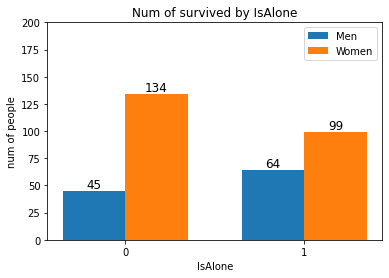

In [20]:
# 일행의 유무에 따른 생존자
labels = [0, 1]

male_alone_survivor = len(titanic_train[(titanic_train['Survived']==1) & (titanic_train['IsAlone']==1) & (titanic_train['Sex']=='male')])
male_notalone_survivor = len(titanic_train[(titanic_train['Survived']==1) & (titanic_train['IsAlone']==0) & (titanic_train['Sex']=='male')])
female_alone_survivor = len(titanic_train[(titanic_train['Survived']==1) & (titanic_train['IsAlone']==1) & (titanic_train['Sex']=='female')])
female_notalone_survivor = len(titanic_train[(titanic_train['Survived']==1) & (titanic_train['IsAlone']==0) & (titanic_train['Sex']=='female')])

male_cnt = [male_notalone_survivor, male_alone_survivor]
female_cnt = [female_notalone_survivor, female_alone_survivor]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_cnt, width, label='Men')
rects2 = ax.bar(x + width/2, female_cnt, width, label='Women')

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

ax.set_xlabel('IsAlone')
ax.set_ylabel('num of people')
ax.set_title('Num of survived by IsAlone')
ax.set_xticks([0, 1])
ax.legend()
ax.set_ylim([0, 200])

plt.show()

# 남성의 경우 일행이 없는 생존자 수가 조금더 많음
# 여성의 경우 일행이 있는 생존자 수가 조금더 많음

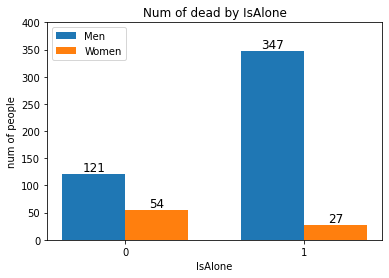

In [21]:
# 일행의 유무에 따른 사망자
labels = [0, 1]

male_alone_dead = len(titanic_train[(titanic_train['Survived']==0) & (titanic_train['IsAlone']==1) & (titanic_train['Sex']=='male')])
male_notalone_dead = len(titanic_train[(titanic_train['Survived']==0) & (titanic_train['IsAlone']==0) & (titanic_train['Sex']=='male')])
female_alone_dead = len(titanic_train[(titanic_train['Survived']==0) & (titanic_train['IsAlone']==1) & (titanic_train['Sex']=='female')])
female_notalone_dead = len(titanic_train[(titanic_train['Survived']==0) & (titanic_train['IsAlone']==0) & (titanic_train['Sex']=='female')])

male_cnt = [male_notalone_dead, male_alone_dead]
female_cnt = [female_notalone_dead, female_alone_dead]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_cnt, width, label='Men')
rects2 = ax.bar(x + width/2, female_cnt, width, label='Women')

for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size = 12)

ax.set_xlabel('IsAlone')
ax.set_ylabel('num of people')
ax.set_title('Num of dead by IsAlone')
ax.set_xticks([0, 1])
ax.legend()
ax.set_ylim([0, 400])

plt.show()
# 남성의 경우 일행이 없는 사망자 수가 훨씬 많음
# 여성의 경우 일행이 있는 사망자 수가 조금 많음

# 위와같은 특성은 일행여부에 관계없이 성별과 인원수에 따라 생존 확률이 결정되는것 같아 보임

# 데이터 전처리 #2

## 훈련세트

In [22]:
# Age 컬럼은 생존확률에 많은 영향을 끼칠 수 있으므로 Age컬럼의 정확도를 높이기 위해
# 이전값을 대체하지말고 이름에 있는 호칭을 이용해 null값을 조금더 자세한 값으로 대체
# Age 컬럼의 null값을 대체하기 전의 데이터 프레임을 확인
titanic_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  IsAlone      891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [354]:
# 이름에서 호칭을 추출
a = titanic_temp['Name'].str.split(', ', expand=True)
b = a[1].str.split('.', expand=True)
print(b)
# 첫번째 컬럼에 호칭에 대한 정보가 있음

        0                                       1     2
0      Mr                             Owen Harris  None
1     Mrs   John Bradley (Florence Briggs Thayer)  None
2    Miss                                   Laina  None
3     Mrs           Jacques Heath (Lily May Peel)  None
4      Mr                           William Henry  None
..    ...                                     ...   ...
886   Rev                                  Juozas  None
887  Miss                          Margaret Edith  None
888  Miss                Catherine Helen "Carrie"  None
889    Mr                             Karl Howell  None
890    Mr                                 Patrick  None

[891 rows x 3 columns]


In [24]:
# 각 호칭별 인원수를 출력
titanic_temp['Title'] = b[0]
print(titanic_temp['Title'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


In [25]:
# 개체 수가 적은 Dr 부터는 기타로 묶음
def user(title):
    if title == "Mr":
        return title
    elif title == "Miss":
        return title
    elif title == "Mrs":
        return title
    elif title == "Master":
        return title
    else:
        return "others"

titanic_temp["Title"]=titanic_temp["Title"].apply(user)
print(titanic_temp['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
others     27
Name: Title, dtype: int64


In [26]:
# 각 호칭 별 나이 평균 확인
titanic_temp.groupby("Title")["Age"].mean()

Title
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
others    42.384615
Name: Age, dtype: float64

In [27]:
# 이 호칭의 나이 평균을 토대로 Age컬럼의 null값을 호칭의 나이 평균값으로 대체
titanic_temp.loc[(titanic_temp["Age"].isnull()) & (titanic_temp["Title"]=="Master"), 'Age'] = 4.57
titanic_temp.loc[(titanic_temp["Age"].isnull()) & (titanic_temp["Title"]=="Miss"), 'Age'] = 21.77
titanic_temp.loc[(titanic_temp["Age"].isnull()) & (titanic_temp["Title"]=="Mr"), 'Age'] = 32.37
titanic_temp.loc[(titanic_temp["Age"].isnull()) & (titanic_temp["Title"]=="Mrs"), 'Age'] = 35.90
titanic_temp.loc[(titanic_temp["Age"].isnull()) & (titanic_temp["Title"]=="others"), 'Age'] = 42.38

titanic_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  IsAlone      891 non-null    float64
 12  Title        891 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [28]:
# 일행과 관련된 컬럼들 삭제
# SibSp, Parch, IsAlone
titanic_2 = titanic_temp.drop(columns = ['SibSp', 'Parch', 'IsAlone'], axis = 1).copy()
titanic_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [29]:
# PassengerId, Name, Title, Ticket, Fare 컬럼 삭제
titanic_2 = titanic_2.drop(columns = ['PassengerId', 'Name', 'Title', 'Ticket', 'Fare'], axis = 1)

In [30]:
titanic_temp1 = titanic_2.copy()
titanic_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [31]:
# 숫자가 아닌데이터들을 숫자화
# Sex 컬럼은 여자면 0, 남자면 1
print(titanic_temp1.head())
sex = pd.get_dummies(titanic_temp1['Sex'])
titanic_temp2 = pd.concat([titanic_temp1, sex], axis = 1)
titanic_temp2 = titanic_temp2.drop(columns=['Sex', 'female'])
titanic_temp2.rename(columns={'male':'Sex'}, inplace = True)
print(titanic_temp2.head())

   Survived  Pclass     Sex   Age Embarked
0         0       3    male  22.0        S
1         1       1  female  38.0        C
2         1       3  female  26.0        S
3         1       1  female  35.0        S
4         0       3    male  35.0        S
   Survived  Pclass   Age Embarked  Sex
0         0       3  22.0        S    1
1         1       1  38.0        C    0
2         1       3  26.0        S    0
3         1       1  35.0        S    0
4         0       3  35.0        S    1


In [32]:
# Embarked 컬럼은 C는 0, Q는 1, S는 2
titanic_temp2['Embarked'] = titanic_temp2['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)

titanic_temp2.head()

,Survived,Pclass,Age,Embarked,Sex
0,0,3,22.0,2,1
1,1,1,38.0,0,0
2,1,3,26.0,2,0
3,1,1,35.0,2,0
4,0,3,35.0,2,1


In [33]:
# 훈련 세트의 특성과 타깃을 나눠줌
train_input = titanic_temp2[['Pclass', 'Sex', 'Age', 'Embarked']]
train_target = titanic_temp2['Survived']

## 테스트 세트

In [34]:
# 테스트 세트도 동일하게 전처리
test_temp = pd.read_csv('/content/test.csv')
test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
c = test_temp['Name'].str.split(', ', expand=True)
d = c[1].str.split('.', expand = True)
print(d)

          0                               1
0        Mr                           James
1       Mrs             James (Ellen Needs)
2        Mr                  Thomas Francis
3        Mr                          Albert
4       Mrs   Alexander (Helga E Lindqvist)
..      ...                             ...
413      Mr                           Woolf
414    Dona                         Fermina
415      Mr                 Simon Sivertsen
416      Mr                       Frederick
417  Master                       Michael J

[418 rows x 2 columns]


In [36]:
test_temp['Title'] = d[0]
print(test_temp['Title'].value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [37]:
# 마찬가지로 개체 수가 적은 y.부터는 기타로 묶음
def user(title):
    if title == "Mr":
        return title
    elif title == "Miss":
        return title
    elif title == "Mrs":
        return title
    elif title == "Master":
        return title
    else:
        return "others"

test_temp["Title"]=test_temp["Title"].apply(user)
print(test_temp['Title'].value_counts())
# 각 호칭 별 나이 평균 확인
test_temp.groupby("Title")["Age"].mean()

Mr        240
Miss       78
Mrs        72
Master     21
others      7
Name: Title, dtype: int64


Title
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
others    43.833333
Name: Age, dtype: float64

In [38]:
# 이 호칭의 나이 평균을 토대로 Age컬럼의 null값을 호칭의 나이 평균값으로 대체
test_temp.loc[(test_temp["Age"].isnull()) & (test_temp["Title"]=="Master"), 'Age'] = 12.97
test_temp.loc[(test_temp["Age"].isnull()) & (test_temp["Title"]=="Miss"), 'Age'] = 24.44
test_temp.loc[(test_temp["Age"].isnull()) & (test_temp["Title"]=="Mr"), 'Age'] = 33.09
test_temp.loc[(test_temp["Age"].isnull()) & (test_temp["Title"]=="Mrs"), 'Age'] = 38.58
test_temp.loc[(test_temp["Age"].isnull()) & (test_temp["Title"]=="others"), 'Age'] = 42.80

test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [39]:
# Pclass, Sex, Age, Embarked 컬럼만 가져옴
test_temp1 = test_temp[['Pclass', 'Sex', 'Age', 'Embarked']]
test_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.2+ KB


In [40]:
# 마찬가지로 숫자가 아닌데이터들을 숫자화
# Sex 컬럼은 여자면 0, 남자면 1
print(test_temp1.head())
sex = pd.get_dummies(test_temp1['Sex'])
test_temp2 = pd.concat([test_temp1, sex], axis = 1)
test_temp2 = test_temp2.drop(columns=['Sex', 'female'])
test_temp2.rename(columns={'male':'Sex'}, inplace = True)
print(test_temp2.head())

   Pclass     Sex   Age Embarked
0       3    male  34.5        Q
1       3  female  47.0        S
2       2    male  62.0        Q
3       3    male  27.0        S
4       3  female  22.0        S
   Pclass   Age Embarked  Sex
0       3  34.5        Q    1
1       3  47.0        S    0
2       2  62.0        Q    1
3       3  27.0        S    1
4       3  22.0        S    0


In [41]:
# Embarked 컬럼은 C는 0, Q는 1, S는 2
test_temp2['Embarked'] = test_temp2['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)
test_temp2.head()

test_input = test_temp2.copy()

In [42]:
# 컬럼 순서가 안맞아서 테스트 세트의 칼럼 순서를 변경
print(train_input.info())
print('-'*50)
print(test_input.info())

test_input = test_input[['Pclass', 'Sex', 'Age', 'Embarked']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    uint8  
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    int64  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 21.9 KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   Embarked  418 non-null    int64  
 3   Sex       418 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 10.3 KB
None


In [43]:
print(train_input.info())
print('='*50)
print(test_input.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    uint8  
 2   Age       891 non-null    float64
 3   Embarked  891 non-null    int64  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 21.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    uint8  
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    int64  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 10.3 KB
None


# 모델훈련#1

In [314]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [493]:
# 점수를 출력하기위해 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(train_input, train_target, test_size = 0.2)

In [482]:
# 모델들의 대략적인 점수 출력
clf3 = SVC(kernel = 'linear')

classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators = [('1', AdaBoostClassifier()),
                                              ('2', RandomForestClassifier()),
                                              ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators= 10, random_state = 0)]


classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                    ]

modelaccuracies = []
modelmeans = []
modelnames = []

classifier_data = zip(classifier_names, classifiers)

for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits = 10, shuffle = True)
  accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf)
  print("Mean accuracy of", classifier_name, ":{:.2f} %".format(accuracies.mean()*100))

# 대략적인 점수가 높은 모델들중 몇개와 XGboost모델을 사용해 하이퍼 파라미터를 조정

Mean accuracy of D_tree :80.06 %
Mean accuracy of RF :80.76 %
Mean accuracy of GNB :77.96 %
Mean accuracy of KNN :75.02 %
Mean accuracy of Ada :78.80 %
Mean accuracy of QDA :62.08 %
Mean accuracy of SVM_l :77.81 %
Mean accuracy of SVM_k :78.94 %
Mean accuracy of Voting :80.05 %
Mean accuracy of Bagging :78.78 %


## 결정트리

In [47]:
# 모델을 훈련하고 스코어 출력
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

# 과대적합

0.9129213483146067
0.7374301675977654


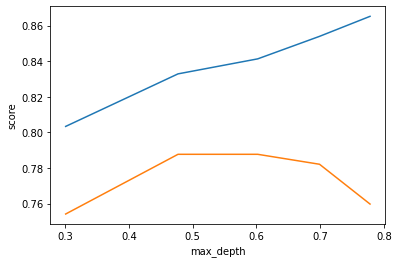

In [48]:
# max_depth의 수치를 조절해 어떤값이 제일 좋은지 그래프로 시각화
# 트리의 최대 깊이
train_score = []
test_score = []

hp_list = list(range(2,7))

for hp in hp_list:
  dt = DecisionTreeClassifier(max_depth=hp)
  dt.fit(X_train, y_train)
  train_score.append(dt.score(X_train, y_train))
  test_score.append(dt.score(X_test, y_test))

plt.plot(np.log10(hp_list), train_score)
plt.plot(np.log10(hp_list), test_score)

plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [49]:
# 최적의 depth값은 3
# depth가 3일때 스코어 출력
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8328651685393258
0.7877094972067039


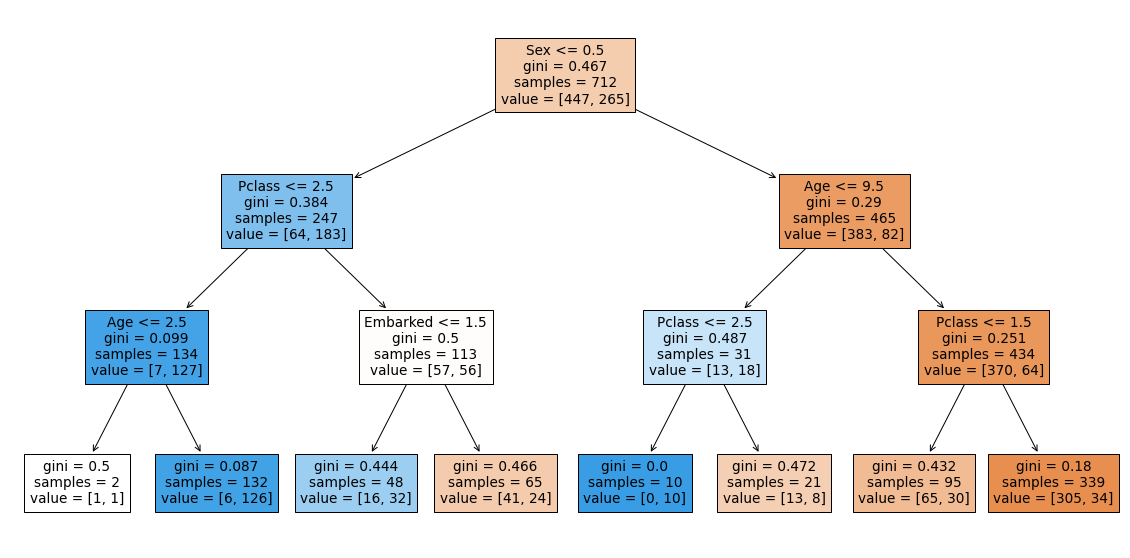

In [50]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
plot_tree(dt, max_depth= 3, filled = True, feature_names = ['Pclass',
																														'Sex', 'Age', 'Embarked'])
plt.show()

In [51]:
# 특성 중요도 출력
# 순서:['Pclass', 'Sex', 'Age', 'Embarked']
print(dt.feature_importances_)

[0.2373479  0.65687621 0.0745671  0.03120879]


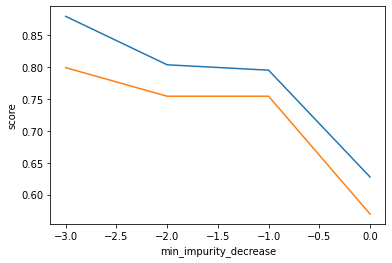

In [52]:
# min_impurity_decrease의 수치를 조절해 어떤값이 제일 좋은지 그래프로 시각화
# 최소 불순도
train_score = []
test_score = []

hp_list = [0.001, 0.01, 0.1, 1]

for hp in hp_list:
  dt = DecisionTreeClassifier(min_impurity_decrease=hp)
  dt.fit(X_train, y_train)
  train_score.append(dt.score(X_train, y_train))
  test_score.append(dt.score(X_test, y_test))

plt.plot(np.log10(hp_list), train_score)
plt.plot(np.log10(hp_list), test_score)

plt.xlabel('min_impurity_decrease')
plt.ylabel('score')
plt.show()

In [53]:
# 최적의 min_impurity_decrease값은 0.1
# min_impurity_decrease가 0.1일때 스코어 출력
dt = DecisionTreeClassifier(min_impurity_decrease=0.1)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.7949438202247191
0.7541899441340782


### 랜덤 서치

In [293]:
# 랜덤서치로 최적의 하이퍼 파라미터값 찾기
params = {'min_impurity_decrease' : uniform(0.0002, 0.0004),
          'max_depth' : randint(20, 30),
          'min_samples_split' : randint(2, 10),
          'min_samples_leaf' : randint(5, 10)}
rs = RandomizedSearchCV(DecisionTreeClassifier(), params,
                        n_iter = 500, n_jobs=-1)
rs.fit(X_train, y_train)
# 최적의 매개변수 조합과 교차 검증 점수 확인
print(rs.best_params_)
print(np.max(rs.cv_results_['mean_test_score']))

{'max_depth': 24, 'min_impurity_decrease': 0.00020387427633281407, 'min_samples_leaf': 5, 'min_samples_split': 8}
0.8146459174628188


In [334]:
be = rs.best_estimator_
print(be.score(X_train, y_train))
print(be.score(X_test, y_test))

0.8047752808988764
0.7597765363128491


In [335]:
# 특성 중요도 출력
# 순서:['Pclass', 'Sex', 'Age', 'Embarked']
print(be.feature_importances_)

# 이 경우 제일 높은 특성 중요도가 나이가 되었음

[0.21212121 0.15151515 0.54545455 0.09090909]


## 랜덤포레스트

In [54]:
# 모델을 훈련하고 스코어 출력
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

# 과대적합

0.9129213483146067
0.7374301675977654


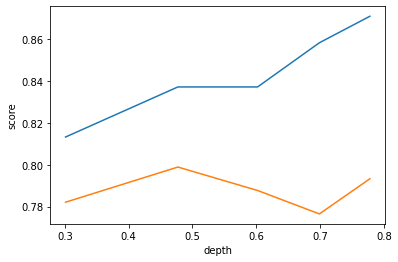

In [55]:
# max_depth의 수치를 조절해 어떤값이 제일 좋은지 그래프로 시각화
# 트리의 최대 깊이
train_score = []
test_score = []

hp_list = list(range(2,7))

for hp in hp_list:
  rf = RandomForestClassifier(max_depth=hp)
  rf.fit(X_train, y_train)
  train_score.append(rf.score(X_train, y_train))
  test_score.append(rf.score(X_test, y_test))

plt.plot(np.log10(hp_list), train_score)
plt.plot(np.log10(hp_list), test_score)

plt.xlabel('depth')
plt.ylabel('score')
plt.show()

In [56]:
# 최적의 depth값은 3
# depth가 3일때 스코어 출력
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.8328651685393258
0.7932960893854749


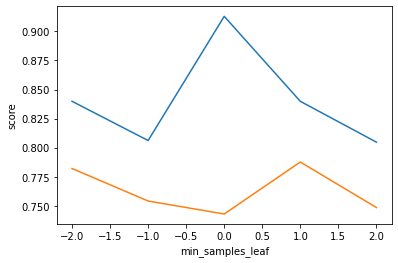

In [57]:
# min_samples_leaf의 수치를 조절해 어떤값이 제일 좋은지 그래프로 시각화
# 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
train_score = []
test_score = []

hp_list = [0.01, 0.1, 1, 10, 100, ]

for hp in hp_list:
  rf = RandomForestClassifier(min_samples_leaf=hp)
  rf.fit(X_train, y_train)
  train_score.append(rf.score(X_train, y_train))
  test_score.append(rf.score(X_test, y_test))

plt.plot(np.log10(hp_list), train_score)
plt.plot(np.log10(hp_list), test_score)

plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.show()

In [58]:
# 최적의 min_samples_leaf 값은 10
# min_samples_leaf가 10일때 스코어 출력
rf = RandomForestClassifier(min_samples_leaf=10)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.8384831460674157
0.7821229050279329


### 랜덤 서치

In [290]:
# 랜덤서치로 최적의 하이퍼 파라미터값 찾기
params = {'max_depth' : randint(20, 30),
          'min_samples_split' : randint(5, 50),
          'min_samples_leaf' : randint(1, 10),
          'max_leaf_nodes' : randint(10, 50)}
rs = RandomizedSearchCV(RandomForestClassifier(), params,
                        n_iter = 100, n_jobs=-1)
rs.fit(X_train, y_train)
# 최적의 매개변수 조합과 교차 검증 점수 확인
print(rs.best_params_)
print(np.max(rs.cv_results_['mean_test_score']))

{'max_depth': 28, 'max_leaf_nodes': 20, 'min_samples_leaf': 3, 'min_samples_split': 6}
0.8258248793460062


In [291]:
be = rs.best_estimator_
print(be.score(X_train, y_train))
print(be.score(X_test, y_test))

0.8581460674157303
0.8100558659217877


## 에이다 부스트

![에이다 부스트](https://images.velog.io/images/tjddls321/post/2ccb894f-72b8-4185-be69-e414e1019290/image.png)

In [68]:
# 여러 번의 분류를 통해 정답을 예측해 가는 알고리즘
# 생성할 약한 학습기의 갯수를 지정
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
print(ab.score(X_train, y_train))
print(ab.score(X_test, y_test))

# 과대적합

0.824438202247191
0.770949720670391


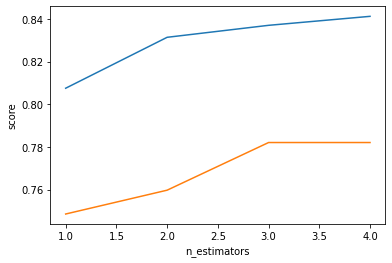

In [74]:
# n_estimators의 수치를 조절해 어떤값이 제일 좋은지 그래프로 시각화
# 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
train_score = []
test_score = []

hp_list = [10, 100, 1000, 10000]

for hp in hp_list:
  ab = AdaBoostClassifier(n_estimators=hp)
  ab.fit(X_train, y_train)
  train_score.append(ab.score(X_train, y_train))
  test_score.append(ab.score(X_test, y_test))

plt.plot(np.log10(hp_list), train_score)
plt.plot(np.log10(hp_list), test_score)

plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

In [76]:
# 최적의 n_estimators값은 1000
# n_estimators가 1000일때 스코어 출력
ab = AdaBoostClassifier(n_estimators=1000)
ab.fit(X_train, y_train)
print(ab.score(X_train, y_train))
print(ab.score(X_test, y_test))

0.8370786516853933
0.7821229050279329


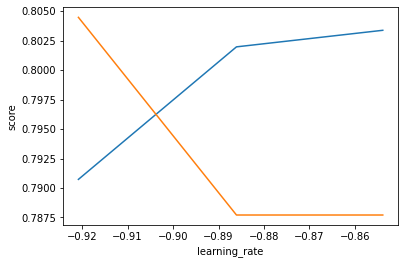

In [384]:
# learning_rate의 수치를 조절해 어떤값이 제일 좋은지 그래프로 시각화
# 학습을 진행할 때마다 적용하는 학습률(0~1)
train_score = []
test_score = []

hp_list = [0.12, 0.13, 0.14]

for hp in hp_list:
  ab = AdaBoostClassifier(learning_rate=hp)
  ab.fit(X_train, y_train)
  train_score.append(ab.score(X_train, y_train))
  test_score.append(ab.score(X_test, y_test))

plt.plot(np.log10(hp_list), train_score)
plt.plot(np.log10(hp_list), test_score)

plt.xlabel('learning_rate')
plt.ylabel('score')
plt.show()

In [154]:
# 최적의learning_rate값은 0.13
# learning_rate가 0.13일때 스코어 출력
ab = AdaBoostClassifier(learning_rate=0.13)
ab.fit(X_train, y_train)
print(ab.score(X_train, y_train))
print(ab.score(X_test, y_test))

0.8019662921348315
0.7877094972067039


### 랜덤서치

In [312]:
# 랜덤서치로 최적의 하이퍼 파라미터값 찾기
params = {'n_estimators' : randint(20, 100),
          'learning_rate' : uniform(0,1)}
rs = RandomizedSearchCV(AdaBoostClassifier(), params,
                        n_iter = 100, n_jobs=-1)
rs.fit(X_train, y_train)
# 최적의 매개변수 조합과 교차 검증 점수 확인
print(rs.best_params_)
print(np.max(rs.cv_results_['mean_test_score']))

{'learning_rate': 0.5265309847048208, 'n_estimators': 33}
0.8005417118093174


In [313]:
be = rs.best_estimator_
print(be.score(X_train, y_train))
print(be.score(X_test, y_test))

0.8047752808988764
0.7597765363128491


## 보팅



In [489]:
# 여러가지 다른 유형의 알고리즘을 같은 데이터셋에 적용해 학습
# 모델을 훈련하고 스코어 출력
clf1 = RandomForestClassifier()
clf2 = AdaBoostClassifier()
clf3 = SVC(kernel='linear')

vt = VotingClassifier(estimators = [('rf', clf1), ('ab', clf2), ('svc_l', clf3)])
vt.fit(X_train, y_train)
print(vt.score(X_train, y_train))
print(vt.score(X_test, y_test))

# 과대적합

0.8328651685393258
0.7988826815642458


In [ ]:
# 의문
# 보팅 모델을 학습할때 랜덤서치 사용 가능?

## 배깅

In [494]:
# 데이터 세트를 여러개로 분리해 분류를 실행
# 모델을 훈련하고 스코어 출력
# 베이스 모델을 서포트 벡터머신 rbf로 지정
bg = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=1000)
bg.fit(X_train, y_train)
print(bg.score(X_train, y_train))
print(bg.score(X_test, y_test))

# 과소적합

0.6320224719101124
0.6312849162011173


In [508]:
# 베이스 모델을  에이다부스트로 지정
bg = BaggingClassifier(base_estimator=AdaBoostClassifier(), n_estimators=1000)
bg.fit(X_train, y_train)
print(bg.score(X_train, y_train))
print(bg.score(X_test, y_test))


0.8132022471910112
0.8100558659217877


In [496]:
# 베이스 모델을 서포트 벡터머신 랜덤포레스트로 지정
bg = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=1000)
bg.fit(X_train, y_train)
print(bg.score(X_train, y_train))
print(bg.score(X_test, y_test))

# 과대적합

0.8946629213483146
0.8044692737430168


## XG부스트

In [337]:
# XGBoost는 Gradient Boosting 알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 라이브러리
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

# 과대적합

0.8567415730337079
0.7988826815642458


In [375]:
# 랜덤서치로 최적의 하이퍼 파라미터값 찾기
params = {'learning rate' : uniform(0.0001, 0.001), # 
          'n_estimators' : randint(10, 100),         # 생성할 weak learner의 수
          #'min_child_weight' : randint(0, 100),     # GBM의 min_samples_leaf와 유사, 관측치에 대한 가중치 합의 최소
          #'min_split_loss' : randint(5, 10),        # 리프노드의 추가분할을 결정할 최소손실 감소값
          'max_depth' : randint(3, 10),             # 트리 기반 알고리즘의 max_depth와 동일
          # 'subsample' : uniform(0.5, 1),            # 데이터 샘플링 비율 지정(과적합 제어)
          'colsample_bytree' : uniform(0, 1)        # 피처가 많을 때 과적합 조절에 사용
          # 'reg_lambda' : randint(50,1000),            # 클수록 과적합 감소 효과
          # 'reg_alpha' : randint(0,1000)               # 클수록 과적합 감소 효과
          }
rs = RandomizedSearchCV(XGBClassifier(), params,
                        n_iter = 100, n_jobs=-1)
rs.fit(X_train, y_train)
# 최적의 매개변수 조합과 교차 검증 점수 확인
print(rs.best_params_)
print(np.max(rs.cv_results_['mean_test_score']))

{'colsample_bytree': 0.6505267870024667, 'learning rate': 0.000531076662674564, 'max_depth': 3, 'n_estimators': 64}
0.8328474342558849


In [376]:
be = rs.best_estimator_
print(be.score(X_train, y_train))
print(be.score(X_test, y_test))

0.8370786516853933
0.8044692737430168


## 점수 비교

### 베스트 점수
 결정트리 (랜덤서치) \\
0.8047752808988764 \\
0.7597765363128491 \\
 \\
랜덤 포레스트
(랜덤서치) \\
0.8581460674157303 \\
0.8100558659217877 \\
 \\
에이다 부스트
(learning_rate=0.13) \\
0.8019662921348315 \\
0.7877094972067039 \\
 \\
보팅 
(1. 랜덤포레스트, 2. 에이다부스트, 3. 서포트벡터머신(k='linear')) \\
0.8412921348314607 \\
0.7988826815642458 \\
 \\
배깅
(에이다부스트) \\
0.8174157303370787 \\
0.7486033519553073 \\
 \\
XG부스트
(랜덤서치) * \\
0.8370786516853933 \\
0.8044692737430168 \\

# 데이터 전처리 #3

In [497]:
# 나이 컬럼을 범주형으로 바꿔서 전처리
# 모델 훈련 전에 나누었던 훈련 세트와 테스트 세트의 나이를 바꿔줌
X_train_temp = X_train.copy()
X_test_temp = X_test.copy()
print(X_train_temp.info())
print(X_test_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 132 to 57
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    uint8  
 2   Age       712 non-null    float64
 3   Embarked  712 non-null    int64  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 22.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 669 to 599
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    uint8  
 2   Age       179 non-null    float64
 3   Embarked  179 non-null    int64  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 5.8 KB
None


In [498]:
print(X_train_temp['Age'].head())
print(X_test_temp['Age'].head())

132    47.00
464    32.37
586    47.00
841    16.00
295    32.37
Name: Age, dtype: float64
669    35.90
159     4.57
692    32.37
269    35.00
560    32.37
Name: Age, dtype: float64


In [499]:
# 전체적인 나이의 범위를 확인 하기 위해 나이의 null을 없앤 데이터 프레임을 불러옴
# 나이를 범주형으로 바꾸기 조금 더 쉽게 하기위하여 소수점을 버림

import math

titanic_tempage = titanic_temp.copy()
titanic_tempage['Age'] = titanic_tempage['Age'].apply(math.floor)
titanic_tempage['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

In [500]:
titanic_tempage['AgeBand'] = pd.cut(titanic_tempage['Age'], 5)
titanic_tempage['AgeBand'].unique()

# 이를 이용해 범위별 카테고리를 지정 가능
#   ~16 = 0
# 17~32 = 1
# 33~48 = 2
# 49~64 = 3
# 64~   = 4

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] <
                                           (48.0, 64.0] < (64.0, 80.0]]

In [501]:
X_train_temp.loc[ X_train_temp['Age'] <= 16, 'Age'] = 0
X_train_temp.loc[(X_train_temp['Age'] > 16) & (X_train_temp['Age'] <= 32), 'Age'] = 1
X_train_temp.loc[(X_train_temp['Age'] > 32) & (X_train_temp['Age'] <= 48), 'Age'] = 2
X_train_temp.loc[(X_train_temp['Age'] > 48) & (X_train_temp['Age'] <= 64), 'Age'] = 3
X_train_temp.loc[ X_train_temp['Age'] > 64, 'Age'] = 4

In [502]:
X_train_temp = X_train_temp.astype({'Age':'int'})
X_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 132 to 57
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    712 non-null    int64
 1   Sex       712 non-null    uint8
 2   Age       712 non-null    int64
 3   Embarked  712 non-null    int64
dtypes: int64(3), uint8(1)
memory usage: 22.9 KB


In [503]:
# 테스트 세트도 동일하게 바꿔줌
X_test_temp.loc[ X_test_temp['Age'] <= 16, 'Age'] = 0
X_test_temp.loc[(X_test_temp['Age'] > 16) & (X_test_temp['Age'] <= 32), 'Age'] = 1
X_test_temp.loc[(X_test_temp['Age'] > 32) & (X_test_temp['Age'] <= 48), 'Age'] = 2
X_test_temp.loc[(X_test_temp['Age'] > 48) & (X_test_temp['Age'] <= 64), 'Age'] = 3
X_test_temp.loc[ X_test_temp['Age'] > 64, 'Age'] = 4

In [504]:
X_test_temp = X_test_temp.astype({'Age':'int'})
X_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 669 to 599
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    179 non-null    int64
 1   Sex       179 non-null    uint8
 2   Age       179 non-null    int64
 3   Embarked  179 non-null    int64
dtypes: int64(3), uint8(1)
memory usage: 5.8 KB


In [505]:
X_train_1 = X_train_temp.copy()
X_test_1 = X_test_temp.copy()

# 모델 훈련#2

In [481]:
# 모델들의 대략적인 점수 출력
clf3 = SVC(kernel = 'linear')

classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators = [('1', AdaBoostClassifier()),
                                              ('2', RandomForestClassifier()),
                                              ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators= 10, random_state = 0)]


classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                    ]

modelaccuracies = []
modelmeans = []
modelnames = []

classifier_data = zip(classifier_names, classifiers)

for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits = 10, shuffle = True)
  accuracies = cross_val_score(classifier, X=X_train_1, y=y_train, cv=skf)
  print("Mean accuracy of", classifier_name, ":{:.2f} %".format(accuracies.mean()*100))

# 나이 전처리 전 데이터
# Mean accuracy of D_tree :80.06 %
# Mean accuracy of RF :80.76 %
# Mean accuracy of GNB :77.96 %
# Mean accuracy of KNN :75.02 %
# Mean accuracy of Ada :78.80 %
# Mean accuracy of QDA :62.08 %
# Mean accuracy of SVM_l :77.81 %
# Mean accuracy of SVM_k :78.94 %
# Mean accuracy of Voting :80.05 %

# 조금씩의 차이가 있지만 현저하게 낮은 QDA의 확률이 개선되었음

Mean accuracy of D_tree :80.06 %
Mean accuracy of RF :80.19 %
Mean accuracy of GNB :77.95 %
Mean accuracy of KNN :78.38 %
Mean accuracy of Ada :78.81 %
Mean accuracy of QDA :78.64 %
Mean accuracy of SVM_l :78.22 %
Mean accuracy of SVM_k :78.37 %
Mean accuracy of Voting :77.94 %
Mean accuracy of Bagging :78.79 %


## 배깅

In [506]:
# 데이터 세트를 여러개로 분리해 분류를 실행
# 모델을 훈련하고 스코어 출력

# 베이스 모델을 서포트 벡터머신 rbf로 지정
bg = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=1000)
bg.fit(X_train_1, y_train)
print(bg.score(X_train_1, y_train))
print(bg.score(X_test_1, y_test))

# 전처리 이전의 점수와 비교
# 0.6320224719101124
# 0.6312849162011173

# 과대적합

0.824438202247191
0.776536312849162


In [509]:
# 베이스 모델을 에이다부스트로 지정
bg = BaggingClassifier(base_estimator=AdaBoostClassifier(), n_estimators=1000)
bg.fit(X_train_1, y_train)
print(bg.score(X_train_1, y_train))
print(bg.score(X_test_1, y_test))

# 전처리 이전의 점수와 비교
# 0.8132022471910112
# 0.8100558659217877

# 점수가 오히려 떨어짐

0.7935393258426966
0.7877094972067039


In [507]:
# 베이스 모델을 랜덤포레스트로 지정
bg = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=1000)
bg.fit(X_train_1, y_train)
print(bg.score(X_train_1, y_train))
print(bg.score(X_test_1, y_test))

# 전처리 이전의 점수와 비교
# 0.8946629213483146
# 0.8044692737430168

0.8328651685393258
0.7821229050279329


In [ ]:
# 의문점
# 세트를 나눌때마다 스코어가 매우 다르게 나오는 이유는 특성의 수인가? 
# 
# 오히려 점수가 떨어지는 경우가있는데 왜그런지 궁금하다.

# 캐글에 제출하기

## 나이 전처리 전

In [523]:
# 나이 전처리를 하기전의 데이터를 이용해
# 스코어가 가장 좋았던 XGBoost모델을 학습

xgb.fit(train_input, train_target)
print(xgb.score(train_input, train_target))

test_target = xgb.predict(test_input)

0.856341189674523


In [531]:
answer = pd.read_csv('/content/gender_submission.csv')

In [534]:
# answer.drop(columns='Survived')
answer['Survived'] = test_target
answer['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [536]:
# 예측한 수치를 csv파일로 저장
answer.to_csv("prediction.csv", index = False)

# Score: 0.77033

## 나이 전처리 후

In [541]:
# 나이를 전처리 후 다시 업로드
train_input_1 = train_input.copy()
test_input_1 = test_input.copy()

In [542]:
# 훈련 세트
train_input_1.loc[ train_input_1['Age'] <= 16, 'Age'] = 0
train_input_1.loc[(train_input_1['Age'] > 16) & (train_input_1['Age'] <= 32), 'Age'] = 1
train_input_1.loc[(train_input_1['Age'] > 32) & (train_input_1['Age'] <= 48), 'Age'] = 2
train_input_1.loc[(train_input_1['Age'] > 48) & (train_input_1['Age'] <= 64), 'Age'] = 3
train_input_1.loc[ train_input_1['Age'] > 64, 'Age'] = 4

In [543]:
train_input_1 = train_input_1.astype({'Age':'int'})
train_input_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    uint8
 2   Age       891 non-null    int64
 3   Embarked  891 non-null    int64
dtypes: int64(3), uint8(1)
memory usage: 21.9 KB


In [547]:
train_input_1['Age'].unique()

array([1, 2, 3, 0, 4])

In [544]:
# 테스트 세트
test_input_1.loc[ test_input_1['Age'] <= 16, 'Age'] = 0
test_input_1.loc[(test_input_1['Age'] > 16) & (test_input_1['Age'] <= 32), 'Age'] = 1
test_input_1.loc[(test_input_1['Age'] > 32) & (test_input_1['Age'] <= 48), 'Age'] = 2
test_input_1.loc[(test_input_1['Age'] > 48) & (test_input_1['Age'] <= 64), 'Age'] = 3
test_input_1.loc[ test_input_1['Age'] > 64, 'Age'] = 4

In [545]:
test_input_1 = test_input_1.astype({'Age':'int'})
test_input_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    uint8
 2   Age       418 non-null    int64
 3   Embarked  418 non-null    int64
dtypes: int64(3), uint8(1)
memory usage: 10.3 KB


In [548]:
test_input_1['Age'].unique()

array([2, 3, 1, 0, 4])

In [549]:
# 전처리를 하고난 후의 데이터를 이용해
# 똑같이 XGBoost모델을 학습

xgb.fit(train_input_1, train_target)
print(xgb.score(train_input_1, train_target))

test_target = xgb.predict(test_input_1)

0.8249158249158249


In [550]:
answer = pd.read_csv('/content/gender_submission.csv')

In [551]:
# answer.drop(columns='Survived')
answer['Survived'] = test_target
answer['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [552]:
# 예측한 수치를 csv파일로 저장
answer.to_csv("prediction1.csv", index = False)

# Score: 0.78468